### Titanic passenger analysis

In [1]:
import pandas as pd


In [2]:
passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()


,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- Are there more men or women survived?
- What kind of data is the `independent` variable?
- What kind of data is the `gender` (independent variable)?
    -`Nominal`

Two types ordinal and categorical:
- `Ordinal` data. Data that can be ordered.
- `Categorical/nominal` data that can not be ordered.

In [3]:
# Margins = True will show summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Gender,,,
Female,143,339,482
Male,709,161,870
All,852,500,1352


Create a stacked bar plot showing the number of lived/ died aby gender

In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

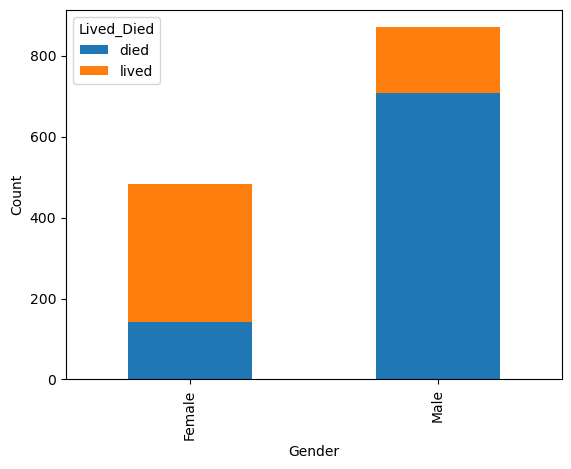

In [5]:
# Get count
# Exclude last column and row (summary info)
contingency_table.iloc[:-1,:-1].plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [6]:
# stat analysis
from scipy import stats # for chi2_contingency
# without summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died']) 

print(stats.chi2_contingency(contingency_table)) #  excluding summary data
stats.chi2_contingency(contingency_table)[0:3] # to get only the stats values
# you get 3 values back:
# 1) Chi-Square (Higher the chi, less likelihood that the observed values were the result of the pure chance)
# 2) Target P-value
# 3) Degrees of freedom (r*rows - 1) * (r columns - 1) = 1


Chi2ContingencyResult(statistic=355.24355436145913, pvalue=3.0570688722545846e-79, dof=1, expected_freq=array([[303.74556213, 178.25443787],
       [548.25443787, 321.74556213]]))


(355.24355436145913, 3.0570688722545846e-79, 1)

## Chi-Square example: Was the age relevant?

In [7]:
# The age is at the time of accident '1912'
# Records with missing values will be 

print(passenger_df['Age'].max())
# The max age is 74.
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10))
contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stat {stats.chi2_contingency(contingency_table)[0:3]}')




74.0
Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stat (24.465546982751874, 0.0009433264132943263, 7)


C:\Users\assse\AppData\Local\Temp\ipykernel_21788\3900989398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)


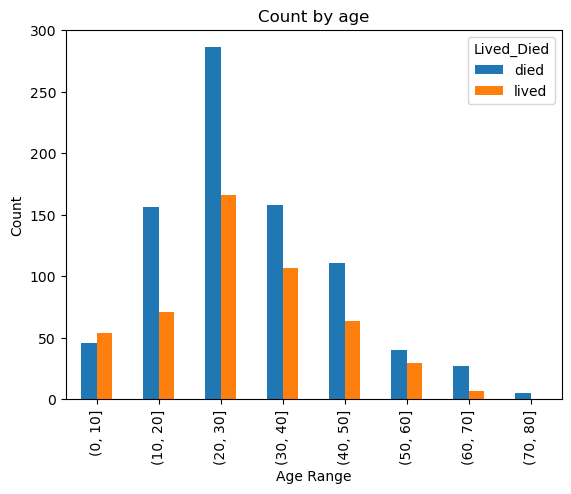

In [8]:
passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Range')
plt.title('Count by age')
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
passenger_df = pd.read_csv('../data/titanic_passengers.csv')

In [10]:
# Create heeatmap
passenger_df.drop(['Name','Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis =1, inplace=True)
passenger_df.dropna(inplace=True)


C:\Users\assse\AppData\Local\Temp\ipykernel_21788\176251772.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])
C:\Users\assse\AppData\Local\Temp\ipykernel_21788\176251772.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


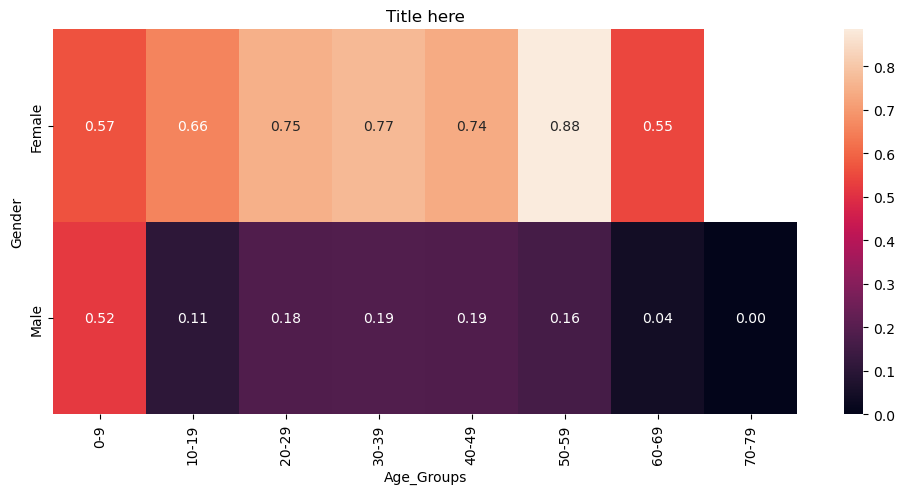

In [19]:
# Encode categorical data
le=preprocessing.LabelEncoder()
passenger_df['Lived_Died_int']=le.fit_transform(passenger_df['Lived_Died'])
passenger_df['Age_Groups'] = pd.cut(x=passenger_df['Age'], bins = range(0,90,10))
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap

# Create a heatmap
plt.figure(figsize=(12,5))
x_axis_label = ['0-9', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_label, fmt='.2f', cmap='rocket')
plt.title('Title here')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Task: Did the Titanic Passenger Class Affected Survivorship (data is ordinal for Passenger_class 1-3)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [13]:
# Create a Stacked bar plot
# create contingency table

contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
print(contingency_table)
print(f'Chi2-Stat {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181
Chi2-Stat (104.05195288933228, 2.543346399916496e-23, 2)


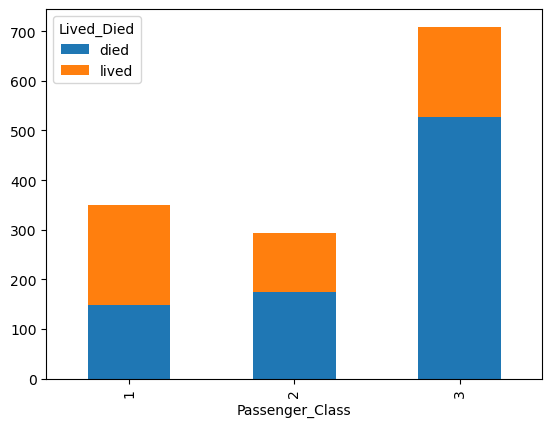

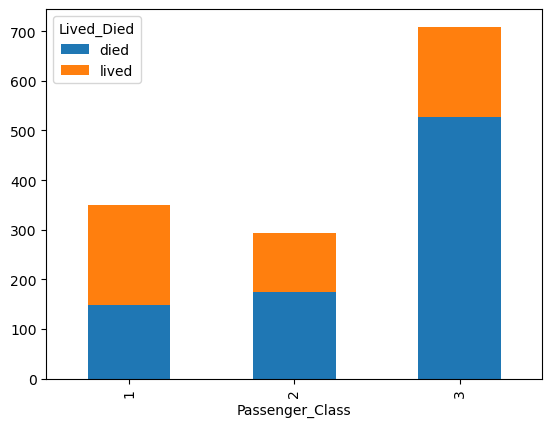

In [18]:
contingency_table.plot(kind='bar', stacked=True)
plt.show()

Which passenger class is responsible for the significant difference in survival rate?
- Chi-Square test offers that at least `one` of the passenger classe is different from what we would expect if the variables
were independent
- Since this our first test, it is considered a  `Prior Test`
- Con continue our analysis, we will run another test, `Post Hoc` test

### Post Hoc (Fisher's Exact test)

- Compare wvewry passenger class to every other class to see if the is statistical significance between the two
- We could apply a `Chi-square` test for each of the the three separate comparison, but our sample is small
- In this case, `Fisher's Test` is better

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [16]:
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
print(contingency_table)

Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181


In [17]:
first_class = contingency_table.iloc[0].values # exact row values
second_class = contingency_table.iloc[1].values #exact row values
third_class = contingency_table.iloc[2].values #exact row values
#Create a aFisher's Exact test to determine if there is a relationship passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact test for First and Second Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact test for First and Third Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([second_class, third_class])
print(f'Fishers Exact test for Second and Third Class: {pvalue}')

Fishers Exact test for First and Second Class: 1.827149276703859e-05
Fishers Exact test for First and Third Class: 7.457205699022123e-24
Fishers Exact test for Second and Third Class: 5.007621820657881e-06


Each of the Fisher's test values reveals statistical significance
Another way to conceptulize is to look at percentage.

| Passenger Class | Died |
|-----------------|------|
|First Class      | 43%  |
|Second Class     | 60%  |
|Third Class      | 74%  |

TODO
 Create a heat map of passenger class split in age ranges and Survival. Similar to above example, but 3 heat maps each for class. (there code in class video)

### T-test: Fare and Gender

While the `ChiSquire` and `Fisher's-Test` focus on `categorical` discrete dependent variable, he `T-Test` and `Anova` tests , target `continuous` data.

#### how was Fare (price of passage) affected by gender and passenger class?
- Did one gender pay more hte other?
- Is there a price difference in between passenger classes
- is there an interaction between gender and passenger class on the resulting fare?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()

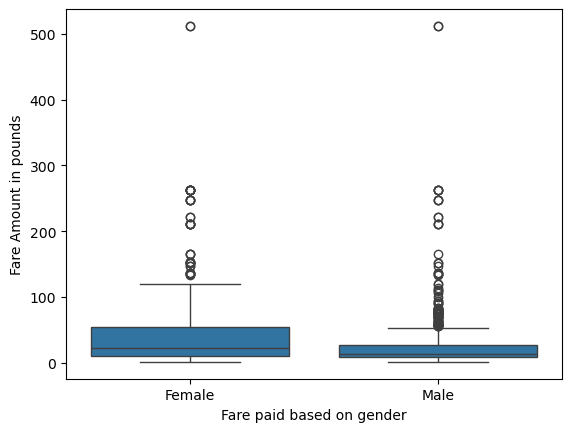

In [20]:
# Box plot
sns.boxplot(y=passenger_df['Fare_decimal'], x = passenger_df['Gender'])
plt.ylabel('Fare Amount in pounds')
plt.xlabel('Fare paid based on gender')
plt.show()

In [22]:
# Stats basics for male category fare cost
male = passenger_df[passenger_df['Gender']=='Male']
print(f'Male Summary {male['Fare_decimal'].describe()}')

female = passenger_df[passenger_df['Gender']=='Female']
print(f'Female Summary {female['Fare_decimal'].describe()}')

Male Summary count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64
Female Summary count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


Out null hypothesis that these is no difference in fare. Lets run tests

In [23]:
from scipy.stats import ttest_ind
# Drop null values
passenger_df.dropna(inplace=True) 
male = passenger_df[passenger_df['Gender']=='Male']
female = passenger_df[passenger_df['Gender']=='Female']

# Run tests
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-test for fare paid p-value {pvalue}')

T-test for fare paid p-value 6.093364811911871e-13


TESTS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [5]:
model = ols('Fare_decimal~ C(Passenger_Class)', data = passenger_df).fit()

# Anova table

anova_table = sm.stats.anova_lm(model, type=1) # TYPE is ANOVA table  format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(>F)` is your `P-value`

#### ANOVA Notation (R style formula):
- The `~` char separates the left side from the right side
- THe `+` char adds a new separateed column to the design matrix
- The `:` char adds a new interaction column to the model
- The `*` char signifies the both individual columns are combined

The string `Fare_decimal~ C(Passenger_Class)` translates to:
- Fare decimal variable is affected by the categorical variable (C) Passenger class

Conclution there is some difference in price relative to the passenger class.

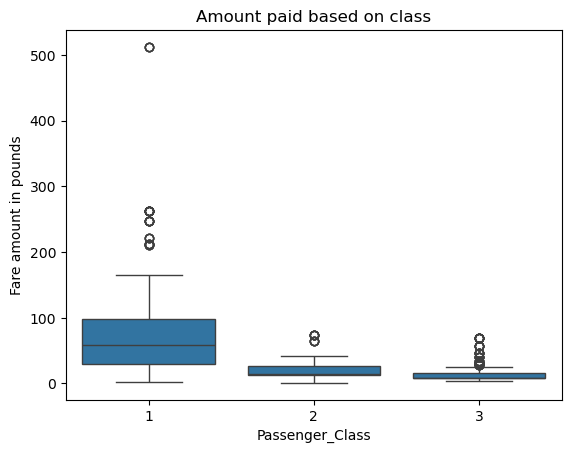

In [6]:
# Create box plot
sns.boxplot(y = passenger_df['Fare_decimal'], x = passenger_df['Passenger_Class'])
plt. ylabel('Fare amount in pounds')
plt.title('Amount paid based on class')
plt.show()

### Post-Hoc analysis.
For ANOVA we use the `Tukey HSD` test test to compare each individual population from statistically significant ANOVA



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
passenger_df = pd.read_csv('../data/titanic_passengers.csv')

# rop unused data
passenger_df.drop(columns=['Born','Died','Fare','Lived_Died','Name','Gender'], inplace=True)
passenger_df.dropna(inplace=True)

In [10]:
mc = MultiComparison(passenger_df['Fare_decimal'], passenger_df['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


if no statistical significance is found then the `REJECT` column will indicate `FALSE`, that is `null-hypothesis` cannot be rejected. In out case we reject null hypothesis.